<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [4]:
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

In [6]:
pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/11/17/fb1a34f3e73debbc2fd15a01ea17eaab3717943d08463ff4979a4f024b3f/pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.1 from https://files.pythonhosted.org/packages/a3/fb/52b62131e21b24ee297e4e95ed41eba29647dad0e0051a92bb66b43c70ff/tzdata-2023.4-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 640.0 kB/s eta 0:00:17
   ---------------------------------------- 0.0/10.6 MB 388.9 kB/s eta 0:00:28
   ---------------------------------------- 0.1/10.6 MB 651.6 kB/s eta 0:0


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Otaib\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [11]:
import requests
import pandas as pd
from io import BytesIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL)
dataset_part_2_csv = BytesIO(response.content)
df = pd.read_csv(dataset_part_2_csv)
df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


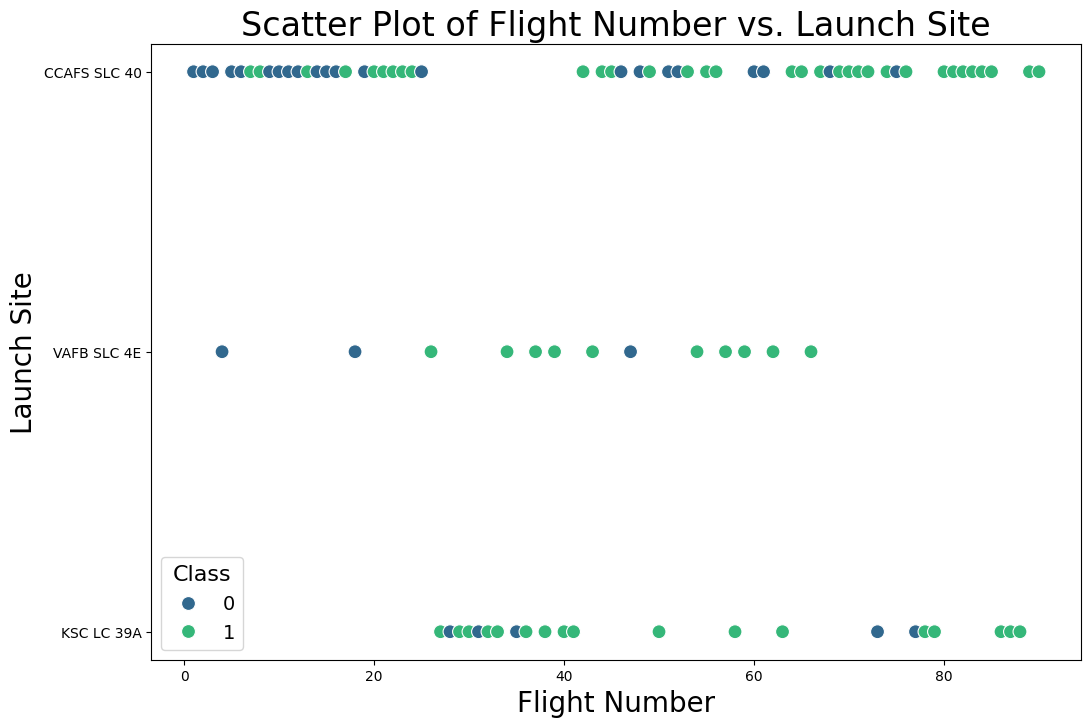

In [12]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', palette='viridis', s=100)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.title('Scatter Plot of Flight Number vs. Launch Site', fontsize=24)
plt.legend(title='Class', fontsize=14, title_fontsize=16)
plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


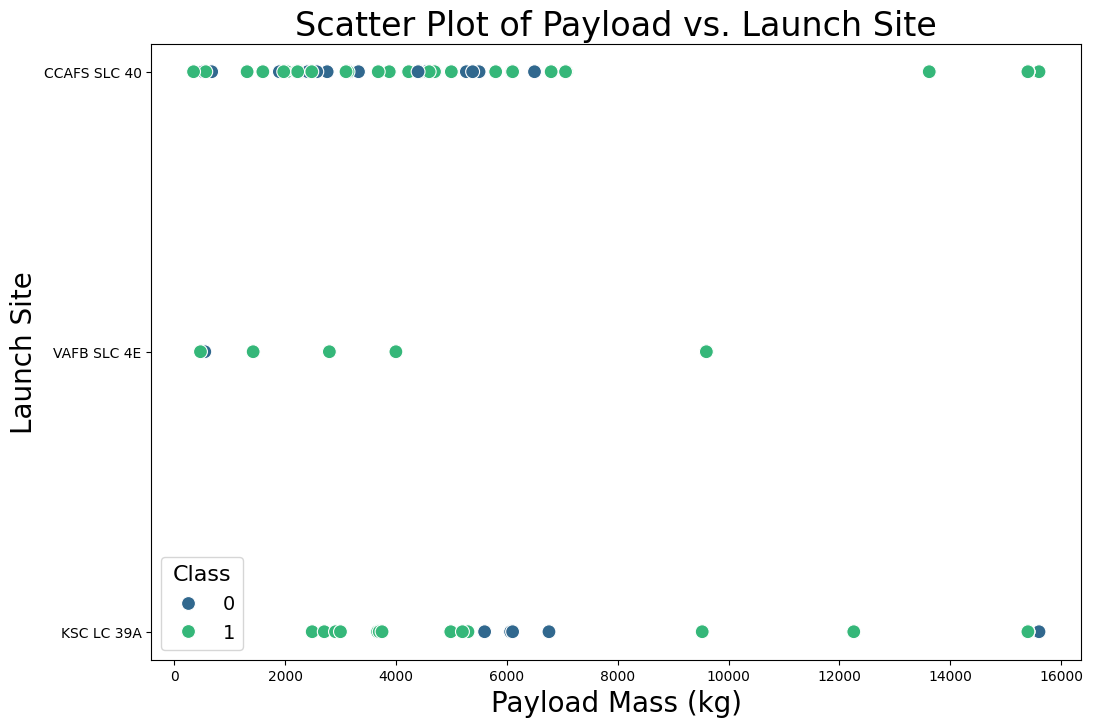

In [13]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', palette='viridis', s=100)
plt.xlabel('Payload Mass (kg)', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.title('Scatter Plot of Payload vs. Launch Site', fontsize=24)
plt.legend(title='Class', fontsize=14, title_fontsize=16)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


C:\Users\Otaib\AppData\Local\Temp\ipykernel_16040\2839157053.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orbit_success_rate, x='Orbit', y='Class', palette='viridis')


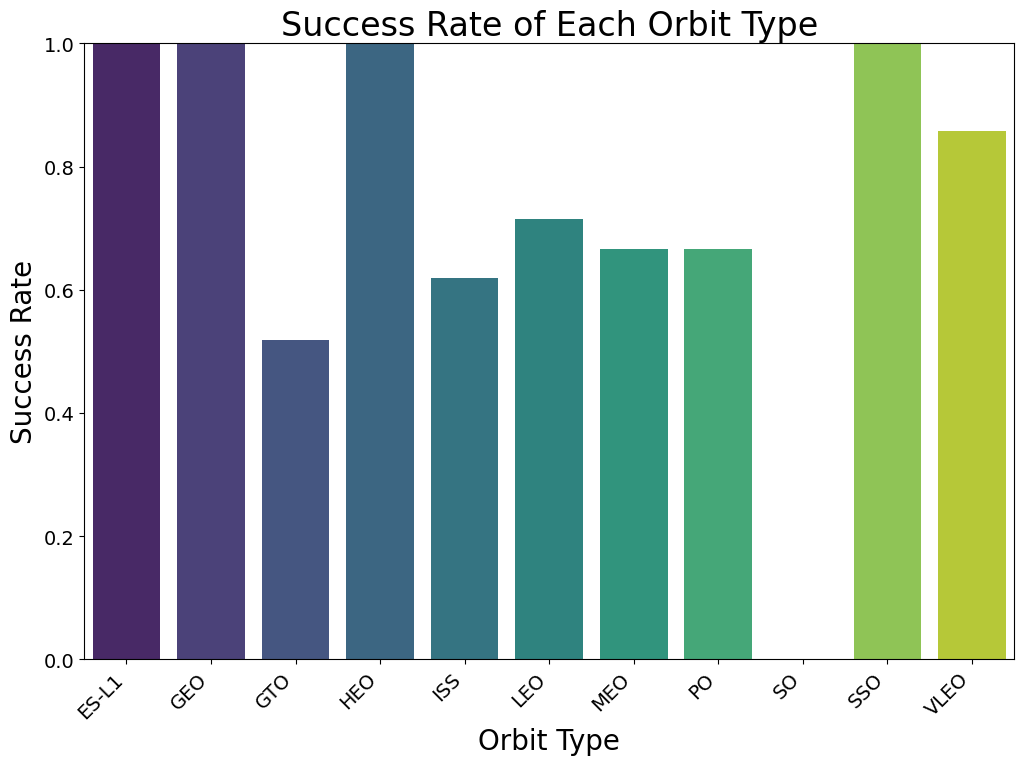

In [14]:
### TASK 2: Visualize the relationship between Payload and Launch Site

# Calculate success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Create a bar chart for success rate of each orbit type
plt.figure(figsize=(12, 8))
sns.barplot(data=orbit_success_rate, x='Orbit', y='Class', palette='viridis')
plt.xlabel('Orbit Type', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.title('Success Rate of Each Orbit Type', fontsize=24)
plt.ylim(0, 1)  # Set y-axis limit to represent success rate between 0 and 1
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


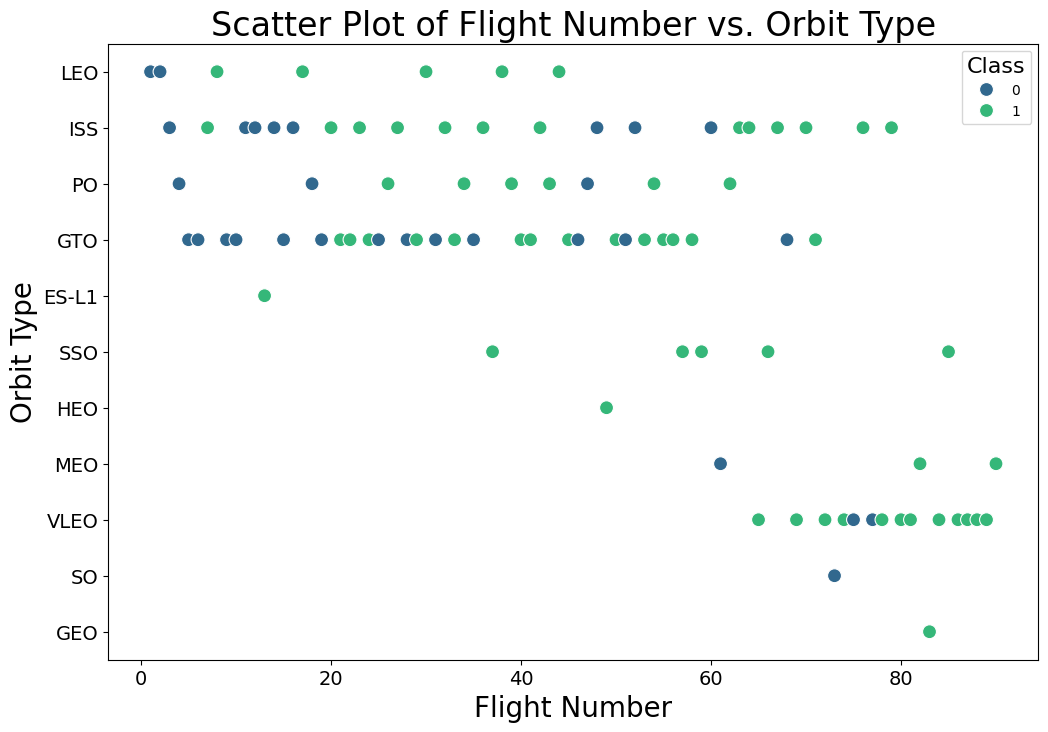

In [15]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

# Create a scatter plot of Flight Number vs. Orbit Type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='viridis', s=100)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit Type', fontsize=20)
plt.title('Scatter Plot of Flight Number vs. Orbit Type', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Class', title_fontsize='16', loc='best')
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


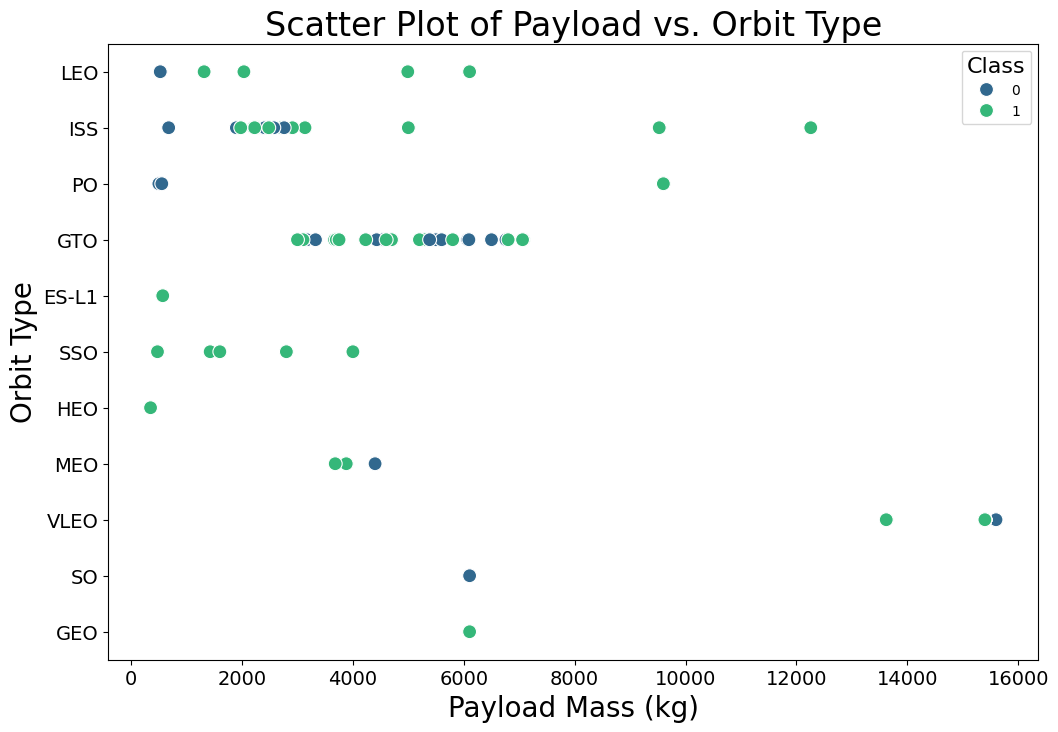

In [16]:
### TASK  3: Visualize the relationship between success rate of each orbit type

# Create a scatter plot of Payload vs. Orbit Type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='viridis', s=100)
plt.xlabel('Payload Mass (kg)', fontsize=20)
plt.ylabel('Orbit Type', fontsize=20)
plt.title('Scatter Plot of Payload vs. Orbit Type', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Class', title_fontsize='16', loc='best')
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


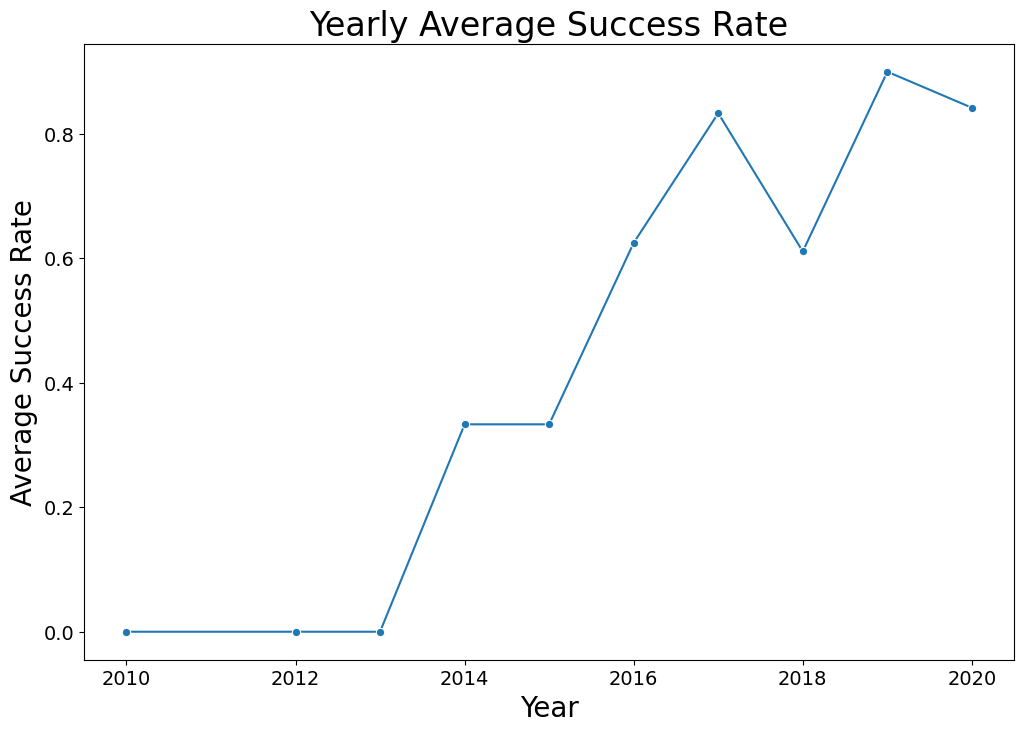

In [18]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate yearly average success rate
yearly_avg_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Create a line chart of yearly average success rate
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_avg_success_rate, x='Year', y='Class', marker='o')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Success Rate', fontsize=20)
plt.title('Yearly Average Success Rate', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [21]:
unique_launch_sites = df['LaunchSite'].unique()
print(unique_launch_sites)

['CCAFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']


In [22]:
launch_sites_starting_with_CCA = df[df['LaunchSite'].str.startswith('CCA')].head(5)
print(launch_sites_starting_with_CCA)

   FlightNumber       Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1 2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2 2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3 2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
4             5 2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
5             6 2014-01-06       Falcon 9  3325.000000   GTO  CCAFS SLC 40   

     Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  ReusedCount  \
0  None None        1     False   False  False        NaN    1.0            0   
1  None None        1     False   False  False        NaN    1.0            0   
2  None None        1     False   False  False        NaN    1.0            0   
4  None None        1     False   False  False        NaN    1.0            0   
5  None None        1     False   False  False        NaN    1.0            0   

  Serial  Longitude   Latitude  Class  Year 

In [23]:
total_payload_nasa = df[df['LaunchSite'].str.contains('NASA')]['PayloadMass'].sum()
print("Total Payload Carried by Boosters from NASA:", total_payload_nasa, "kg")

Total Payload Carried by Boosters from NASA: 0.0 kg


In [25]:
average_payload_f9_v1_1 = df[df['BoosterVersion'] == 'Falcon 9']['PayloadMass'].mean()
print("Average Payload Mass Carried by Booster Version F9 v1.1:", average_payload_f9_v1_1, "kg")

Average Payload Mass Carried by Booster Version F9 v1.1: 6104.959411764707 kg


In [29]:
# Define the success criteria
success_criteria = ['True Ocean', 'True RTLS', 'True ASDS']

# Filter for successful landings based on the success criteria
success_ground_pad = df[(df['LandingPad'].notnull()) & (df['Outcome'].isin(success_criteria))]

# Find the date of the first successful landing on a ground pad
first_successful_ground_pad_date = success_ground_pad.sort_values(by='Date')['Date'].iloc[0]

print("Date of the First Successful Landing on Ground Pad:", first_successful_ground_pad_date)


Date of the First Successful Landing on Ground Pad: 2015-12-22 00:00:00


In [30]:
# Filter the DataFrame based on the specified conditions
filtered_data = df[(df['Outcome'] == 'True ASDS') & (df['PayloadMass'] > 4000) & (df['PayloadMass'] < 6000)]

# Select the BoosterVersion column from the filtered data
result = filtered_data['BoosterVersion']

# Display the result
print(result)

20    Falcon 9
23    Falcon 9
28    Falcon 9
39    Falcon 9
54    Falcon 9
69    Falcon 9
Name: BoosterVersion, dtype: object


In [31]:
# Use value_counts() to count the occurrences of each unique value in the 'Outcome' column
outcome_counts = df['Outcome'].value_counts()

# Display the result
print(outcome_counts)

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


In [35]:
# Find the row with the maximum payload mass
max_payload_row = df[df['PayloadMass'] == df['PayloadMass'].max()]

# Extract the FlightNumber from the row
flight_number_with_max_payload = max_payload_row['FlightNumber'].values[0]

# Display the result
print("Flight Number with Maximum Payload Mass:", flight_number_with_max_payload)

Flight Number with Maximum Payload Mass: 69


In [41]:
# Convert 'Date' column to string
df['Date'] = df['Date'].astype(str)

# Filter the data for failed landing outcomes in drone ship in year 2015
failed_landings_2015 = df[(df['Outcome'].str.contains('False ASDS')) & (df['Date'].str.startswith('2015'))]

# Display the result
print(failed_landings_2015[['FlightNumber', 'BoosterVersion', 'LaunchSite', 'Outcome']])


    FlightNumber BoosterVersion    LaunchSite     Outcome
11            12       Falcon 9  CCAFS SLC 40  False ASDS
13            14       Falcon 9  CCAFS SLC 40  False ASDS


In [43]:
landing_outcomes_count = df[(df['Date'] >= '2010-06-04') & (df['Date'] <= '2017-03-20')]['Outcome'].value_counts().sort_values(ascending=False)
print(landing_outcomes_count)

Outcome
None None      9
True ASDS      5
False ASDS     4
True Ocean     3
True RTLS      3
False Ocean    2
None ASDS      2
Name: count, dtype: int64


Analyze the ploted bar chart try to find which orbits have high sucess rate.


In [20]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


In [ ]:
### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [ ]:
### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

you can observe that the sucess rate since 2013 kept increasing till 2020


In [ ]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

In [ ]:
### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns

In [ ]:
### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
